#### 1- Stating and refining the question.
##### What is the relation between the number of people at some seniority level with the company Type? 

In [28]:
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [29]:
df1 = []
df = data_pre(df1)
df = df.apply(lambda x: x.astype(str).str.lower())

['Startup' 'Product' nan 'Consulting / Agency' 'Bodyshop / Outsource'
 'University' 'Bank' 'Outsource']


In [30]:
######################################## Seniority Level Exploration #####################################

In [31]:
# clean Seniority Level 
def clean_senior_col(df):
    meaninigless_values = ['nan','student','working student','no idea, there are no ranges in the firm','no level','no level ']
    df = df[~df['Seniority'].isin(meaninigless_values)]
    return df

In [32]:
df = clean_senior_col(df)
df['Seniority'].value_counts()

Seniority
senior                                       1152
middle                                        638
lead                                          201
junior                                        152
head                                           50
principal                                       6
intern                                          2
c-level executive manager                       1
entry level                                     1
c-level                                         1
no idea, there are no ranges in the firm        1
director                                        1
key                                             1
cto                                             1
work center manager                             1
manager                                         1
vp                                              1
self employed                                   1
Name: count, dtype: int64

#### 2- Exploring the data.

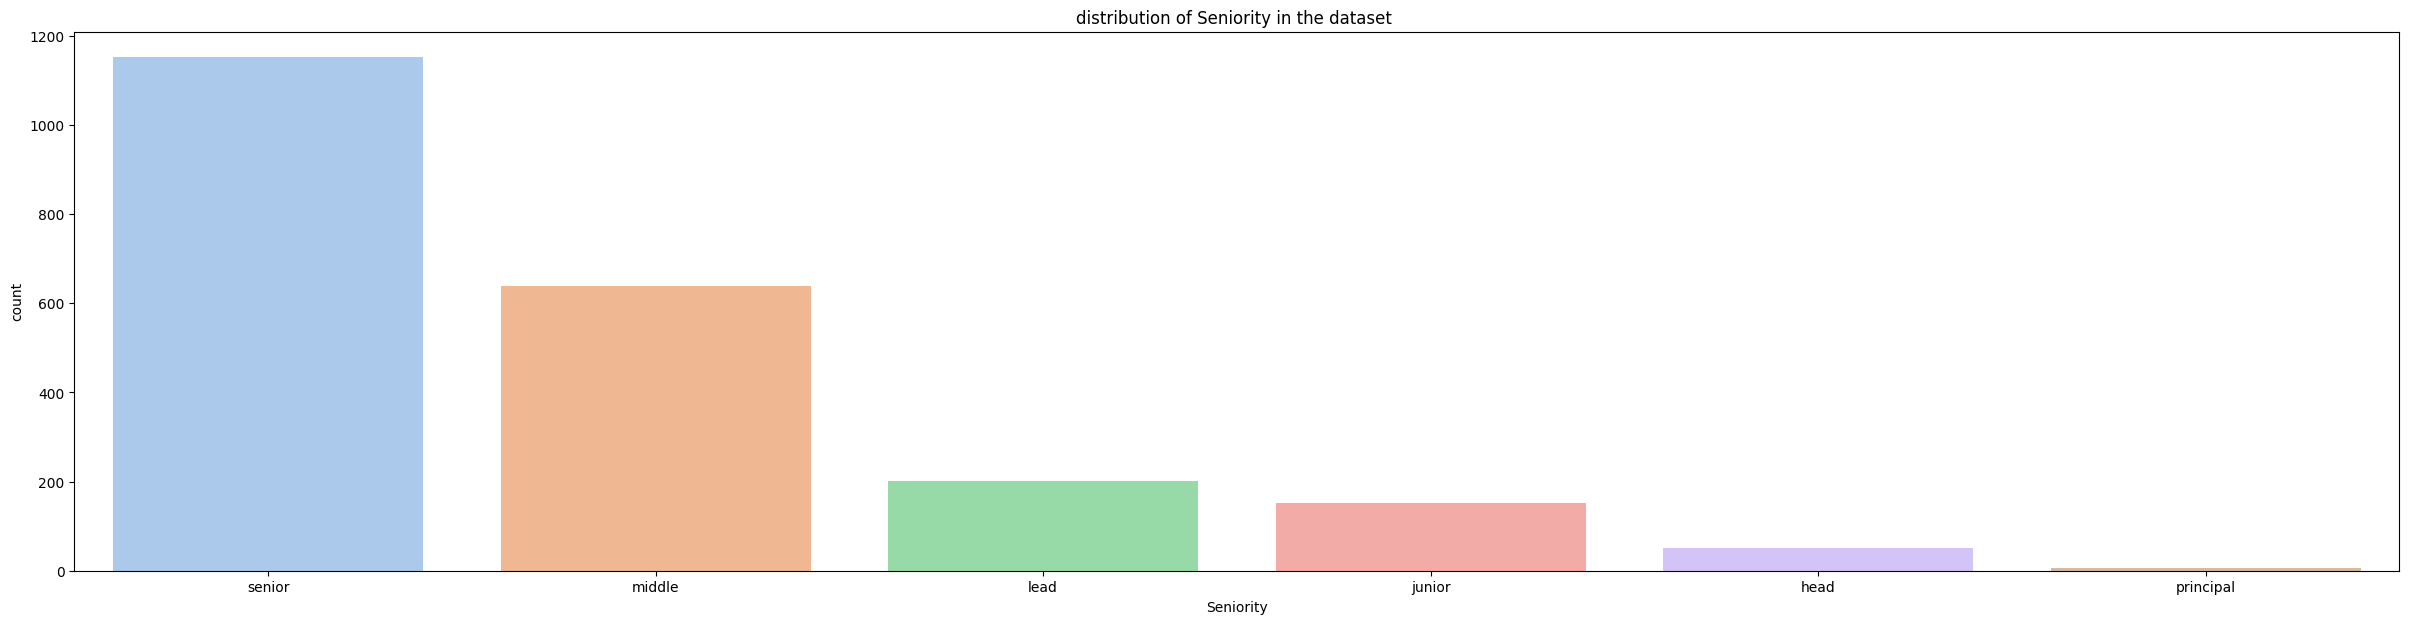

In [33]:
# get the distribution of the Seniority levels in the dataset 
# get the top frequent 6 Levels (>=6)
plt.figure(figsize=(30,7))
sns.countplot(x = 'Seniority', data = df, palette = 'pastel',order=df['Seniority'].value_counts().iloc[:6].index)
plt.title('distribution of Seniority in the dataset ')
plt.show()

In [34]:
# get the top frequent 6 Levels (>=6)
level_remain_values = ['senior','middle','lead','junior','head','principal']
df =df.loc[df['Seniority'].isin(level_remain_values)]

In [35]:
############################### EXPLORING COMPANY TYPE ##############################

In [36]:
# df['Company_Type'].unique()
print(df['Company_Type'].value_counts().index.tolist())

['product', 'startup', 'consulting / agency', 'nan', 'bodyshop / outsource', 'bank', 'university', 'e-commerce', 'corporation', 'utilities', 'fintech', 'ecommerce', 'media', 'research', 'finance', 'old industry', 'semiconductor', 'automotive ', 'institute', 'handel ', 'consulting and product', 'education', 'corporation ', 'pharma', 'faang', 'transport & logistics', 'biergarten ', 'research institute', 'non-tech retail', 'corporate incubator', 'outsourse', 'multinational ', 'industry', 'retail', 'bloody enterprise', 'science institute ', 'insurance', 'cloud', 'behörde', 'big commercial', 'outsorce', 'bank ', 'automotive', 'it department of established business', 'telecommunications', 'systemhaus', 'consumer goods', 'it-outsourcing', 'game company', 'financial ', 'publishing and technology', 'market research ', 'saas', 'publisher', 'energy ', 'enterprise', 'service', 'concern', 'outsource']


In [37]:
# clean Company_Type from nan values 
df =df[df['Company_Type'] != 'nan']

In [38]:
df['Company_Type'].value_counts().iloc[:8]

Company_Type
product                 1362
startup                  423
consulting / agency      254
bodyshop / outsource      30
bank                      11
university                 8
e-commerce                 5
corporation                2
Name: count, dtype: int64

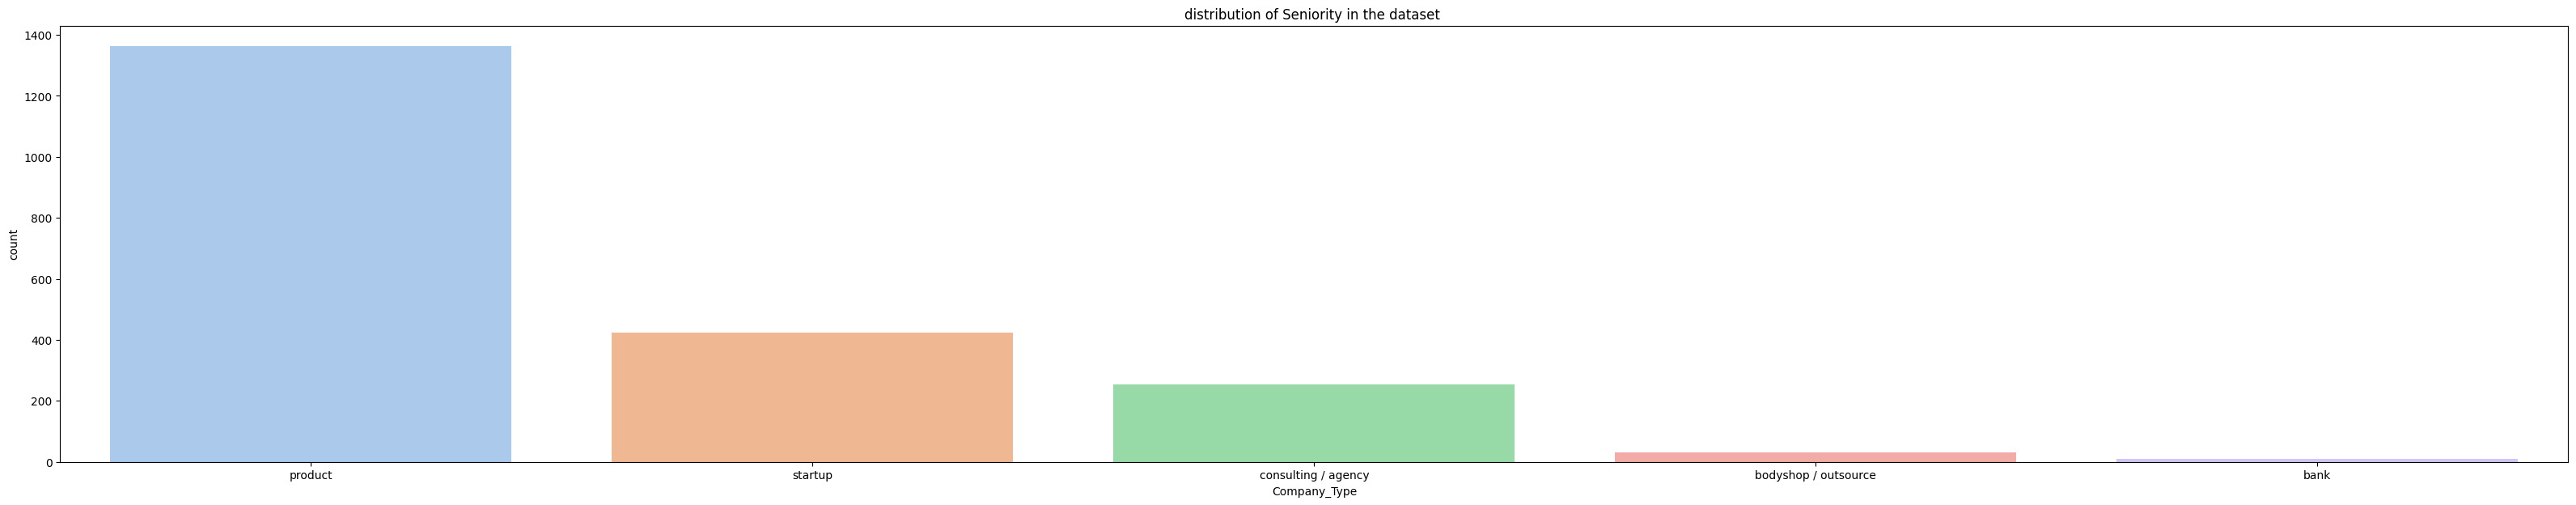

In [39]:
# get the distribution of the Company_Type in the dataset 
# get top frequent 7 (>=5)
plt.figure(figsize=(40,7))
sns.countplot(x = 'Company_Type', data = df, palette = 'pastel',order=df['Company_Type'].value_counts().iloc[:5].index)
plt.title('distribution of Seniority in the dataset ')
plt.show()

In [40]:
# remove all values that appear little in company type 
company_remain_values = ['product','startup','consulting / agency','bodyshop / outsource','bank','university']
df =df.loc[df['Company_Type'].isin(company_remain_values)]

#### 3- Format Modeling to answer the question 

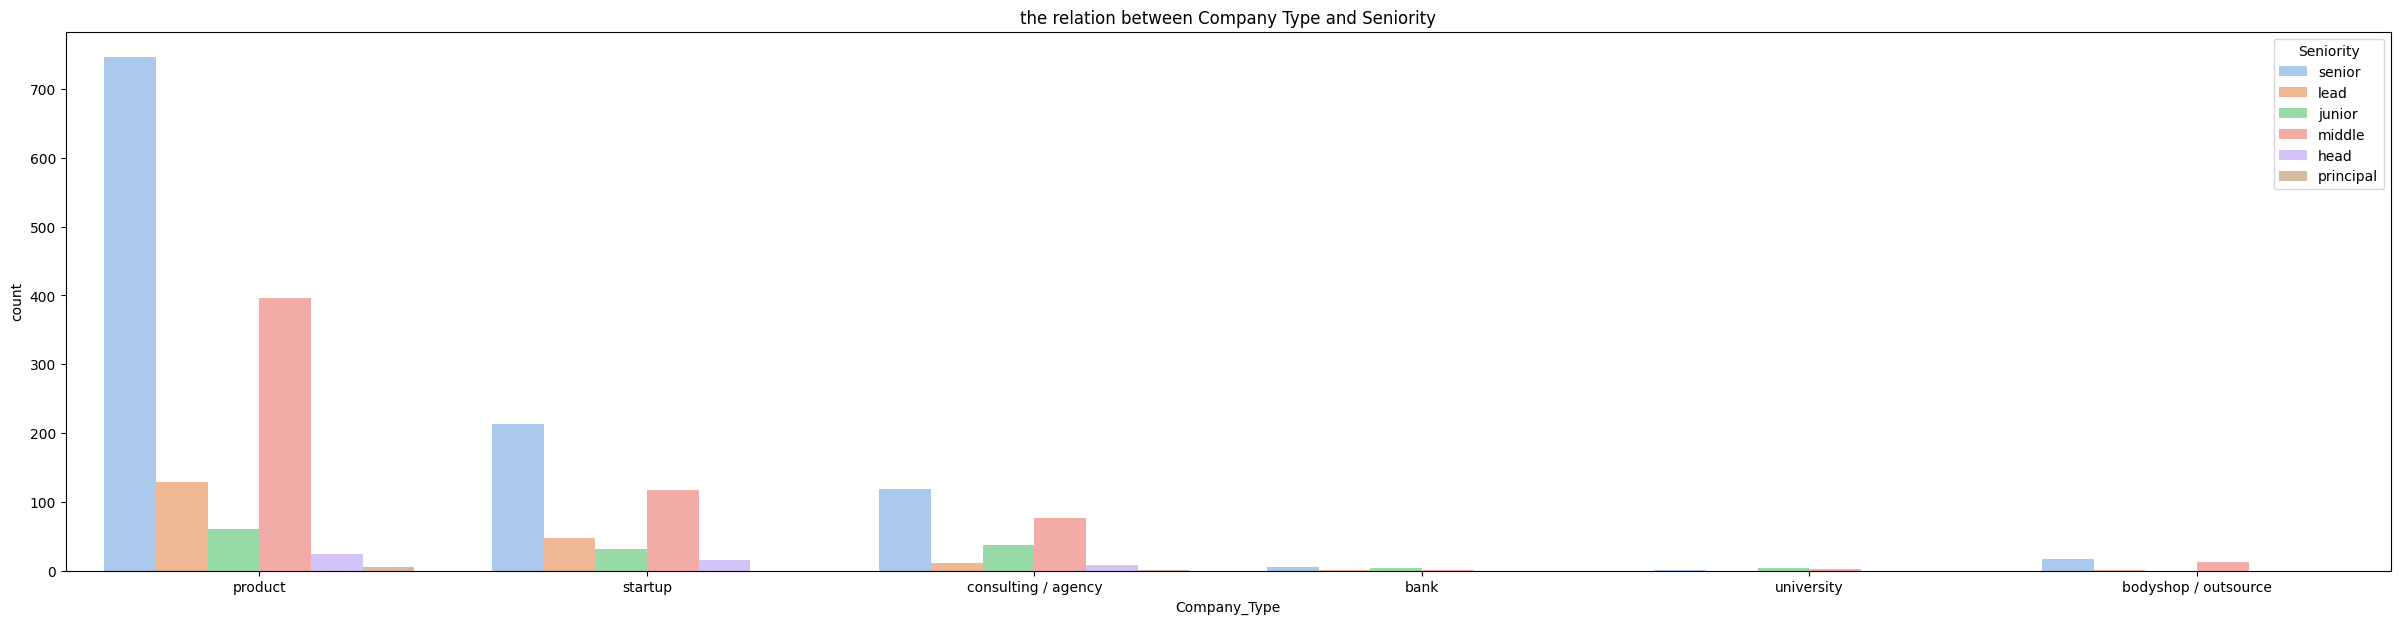

In [41]:
plt.figure(figsize=(30,7))
sns.countplot(x = 'Company_Type', data = df, hue = 'Seniority', palette = 'pastel')
plt.title('the relation between Company Type and Seniority')
plt.show()

<Axes: xlabel='Company_Type', ylabel='Seniority'>

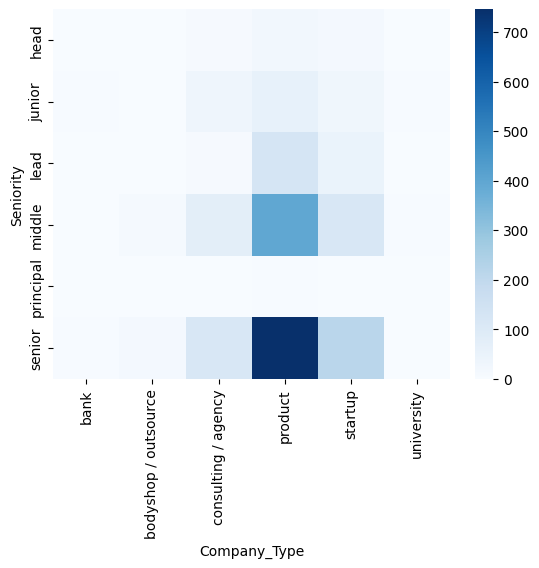

In [46]:
# calculate the conditional frequency of seniority level for each company type
freq_table = pd.crosstab(df['Seniority'], df['Company_Type'])

# visualize the conditional frequency table using a heatmap
sns.heatmap(freq_table, cmap='Blues')

In [47]:
from scipy.stats import chi2_contingency
# calculate the chi-squared statistic and p-value
_, p,_,_ = chi2_contingency(freq_table)
print('P-value:', p)

P-value: 1.7090265587771502e-11


In [ ]:
#TODO: get P value with other factors in the dataset 

#### 4- Interpreting the results.

#### Comments 
1. it seems that seniority level is the most frequent level regardless of company type, However,the difference in the number of senior and junior employees is larger in product companies compared to startups, and for the kead and lead seniority level , they appeared little in all types as we expect 

2. This result may suggest that product companies may have a greater emphasis on hiring experienced and senior-level employees, potentially due to the need for specialized skills and expertise in product development. On the other hand, startups may be more willing to hire junior-level employees and provide them with opportunities for growth and advancement.

3. the lead and head level is less frequent in all types of companies. This may suggest that these higher-level positions are relatively rare and require significant experience and expertise to attain.

#### Expectations :
1. Seniors will be the most frequent seniority level in all companies 
2. Head and lead will be the least frequent seniority level in all companies 
3. the number of juniors compared to seniors in the company will depend on company type (startups will contain more juniors) 

#### Results vs Expectation :
1. Matched 
2. Matched 
3. Matched 
